<a href="https://colab.research.google.com/github/ashutosh-sharma-xi/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#installing basemap module which is no present in google colab by defalut
%pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset
file_path = "/content/drive/MyDrive/AlmaBetter /Capstone Project/Global Terrorism Analysis/Global Terrorism Data.csv"
gt_df = pd.read_csv(file_path,encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# This will allow the columns to be displayed. As there are 135 columns.
# pd.set_option('display.max_columns', None)

# **Data Understanding**

In [ ]:
# viewing the last 5 rows of the dataset
gt_df.tail() 

eventid  iyear  imonth  iday approxdate  extended resolution  \
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region  ... addnotes  \
181686      182      Somalia      11  ...      NaN   
181687      200        Syria      10  ...      NaN   
181688      160  Philippines       5  ...      NaN   
181689       92        India       6  ...      NaN   
181690      160  Philippines       5  ...      NaN   

                                                   scite1  \
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
181686  START Primary Collection        0         0        0       0      NaN  
181687  START Primary Collection       -9        -9        1       1      NaN  
181688  START Primary Collection        0         0        0       0      NaN  
181689  START Primary Collection       -9        -9        0      -9      NaN  
181690  START Primary Collection       -9        -9        0      -9      NaN  

[5 rows x 135 columns]

In [ ]:
# view shape of the dataset
gt_df.shape

(181691, 135)

In [ ]:
# view the information of the dataaset
gt_df.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

In [ ]:
# view the statistical information of the dataset using describe
gt_df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

some false values are present in the data like 0 in month and day column, outliers can also be seen  in both ends.

In [ ]:
# see the column names of the dataset
print(gt_df.columns)      

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [ ]:
# see the number of missing value in the columns
pd.DataFrame(gt_df.isna().sum().sort_values( ascending = False))

0
gsubname3         181671
weapsubtype4_txt  181621
weapsubtype4      181621
weaptype4         181618
weaptype4_txt     181618
...                  ...
suicide                0
success                0
crit3                  0
property               0
eventid                0

[135 rows x 1 columns]

In [ ]:

# check percentage  of null value in the dataframe  
pd.DataFrame((gt_df.isna().sum()/len(gt_df)*100).sort_values(ascending = False)).T

gsubname3  weapsubtype4_txt  weapsubtype4  weaptype4  weaptype4_txt  \
0  99.988992         99.961473     99.961473  99.959822      99.959822   

   claimmode3  claimmode3_txt  gsubname2     claim3  guncertain3     gname3  \
0   99.926799       99.926799  99.911938  99.824978    99.823877  99.821675   

      divert  attacktype3  attacktype3_txt  ransomnote  ransompaidus  \
0  99.821675    99.764435        99.764435   99.717102     99.696187   

   ransomamtus  claimmode2  claimmode2_txt  ransompaid      corp3  \
0    99.690133   99.660963       99.660963   99.574002  99.435305   

   targsubtype3  targsubtype3_txt  natlty3_txt    natlty3    target3  \
0     99.396228         99.396228    99.368708  99.368708  99.353298   

   targtype3  targtype3_txt  ransomamt  weapsubtype3_txt  weapsubtype3  \
0  99.352747      99.352747   99.25698         99.068198     99.068198   

   weaptype3_txt  weaptype3     claim2  guncertain2     gname2  resolution  \
0      98.974633  98.974633  98.959772    98.923997  98.892075   98.778145   

   kidhijcountry     nhours  compclaim   gsubname  attacktype2  \
0      98.180978  97.763786  97.336687  96.758232    96.524869   

   attacktype2_txt      ndays  approxdate      corp2  nreleased  targsubtype2  \
0        96.524869  95.528672   94.914993  94.431755  94.275996     94.119136   

   targsubtype2_txt    natlty2  natlty2_txt  hostkidoutcome_txt  \
0         94.119136  94.040431    94.040431           93.950719   

   hostkidoutcome    target2  targtype2_txt  targtype2  weapsubtype2  \
0       93.950719  93.934757       93.86651   93.86651     93.647456   

   weapsubtype2_txt  weaptype2  weaptype2_txt  nhostkidus   nhostkid  \
0         93.647456  92.775096      92.775096   92.560446  92.530175   

   claimmode_txt  claimmode    related   addnotes  alternative  \
0      89.497003  89.497003  86.219461  84.430159    84.032781   

   alternative_txt  propvalue     scite3     motive   location  propcomment  \
0        84.032781  78.541039  76.049447  72.171984  69.456385    68.100236   

   propextent  propextent_txt     scite2     ransom     nperps   nperpcap  \
0   64.739585       64.739585  57.657231  57.410659  39.140629  38.245703   

   nwoundte  weapdetail   nkillter     scite1    summary    claimed  nwoundus  \
0  38.05527   37.244553  36.852678  36.430533  36.396409  36.391456  35.61101   

     nkillus      corp1  weapsubtype1  weapsubtype1_txt   nwound  \
0  35.470111  23.418882     11.430396         11.430396  8.97733   

   targsubtype1  targsubtype1_txt    nkill  longitude  latitude  natlty1  \
0      5.709144          5.709144  5.67612   2.508104  2.507554  0.85805   

   nationality   target1      city  provstate  guncertain1  ishostkid  \
0      0.85805  0.350045  0.238867   0.231712     0.209146   0.097969   

   specificity  doubtterr  multiple  crit1  year  day  month  target  gang  \
0     0.003302    0.00055   0.00055    0.0   0.0  0.0    0.0     0.0   0.0   

   individual  dbsource  country  INT_LOG  INT_IDEO  INT_MISC  INT_ANY  \
0         0.0       0.0      0.0      0.0       0.0       0.0      0.0   

   extended  region  country_name  region  crit2  targtype1  weaptype1  \
0       0.0     0.0           0.0     0.0    0.0        0.0        0.0   

   weapon  attack_type  attacktype1  vicinity  suicide  success  crit3  \
0     0.0          0.0          0.0       0.0      0.0      0.0    0.0   

   property  eventid  
0       0.0      0.0

 Most of the columns have null values here.  columns have highly variable null value, some have nearly 99% null values null counts varying from 99% to 1%, so  will use only few important features

In [ ]:
# see the top 5 rows of the dataset
gt_df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
#selecting only those columns which are usefull and dont have high number of null values

gt_df.rename(columns = {"attacktype1_txt":'attack_type',"country_txt":'country_name',"iday":'day', "imonth":'month', "iyear":'year',"natlty1_txt":'nationality',
              "region_txt":'region',"targtype1_txt":'target',"weaptype1_txt":'weapon',"gname":'gang'}, inplace = True)
df = gt_df[['attack_type','city' ,'country_name' ,'gang' ,'day' ,'month' ,'year' 
            ,'nkill' ,'success' ,'nationality' ,'provstate' ,'region' ,'target1' 
            ,'target' ,'weapon' ,'latitude' ,'longitude']]
df.head(3)

attack_type           city        country_name  \
0                Assassination  Santo Domingo  Dominican Republic   
1  Hostage Taking (Kidnapping)    Mexico city              Mexico   
2                Assassination        Unknown         Philippines   

                                 gang  day  month  year  nkill  success  \
0                              MANO-D    2      7  1970    1.0        1   
1  23rd of September Communist League    0      0  1970    0.0        1   
2                             Unknown    0      1  1970    1.0        1   

          nationality provstate region                       region  \
0  Dominican Republic       NaN      2  Central America & Caribbean   
1             Belgium   Federal      1                North America   
2       United States    Tarlac      5               Southeast Asia   

                   target1                       target   weapon   latitude  \
0             Julio Guzman  Private Citizens & Property  Unknown  18.456792   
1  Nadine Chaval, daughter      Government (Diplomatic)  Unknown  19.371887   
2                 Employee          Journalists & Media  Unknown  15.478598   

    longitude  
0  -69.951164  
1  -99.086624  
2  120.599741

# **EDA and Visualization**

## **Important insights to draw from the data**
#### Q1: Number of attack per year 
#### Q2: World Wide what are the major attack_types used?
#### Q3: Geographic Representation on Map, in which places attacks have been done since 1970
#### Q4: Top 6 highly attacked regions in india with different attack types
#### Q5: Weapon used per Attacktype in India
#### Q6: Number of attacks per attack type in top 10 most attacked countries ?
#### Q7: Terrorist group attacking most number of times?
#### Q8: Statewise Attacks in India
#### Q9: What most of the Addnotes say?

<!-- # Q1: Number of attack per year 
# Q2: World Wide what are the major attack_types used?
# Q3: Geographic Representation on Map, in which places attacks have been done since 1970
# Q4: Top 6 highly attacked regions in india with different attack types
# Q5: Weapon used per Attacktype in India
# Q6: Number of attacks per attack type in top 10 most attacked countries ?
# Q7: Terrorist group attacking most number of times? -->

## Number of attack per year

In [ ]:
#group by year 
Atk_pr_yr = df.groupby(['year'])['year'].count()

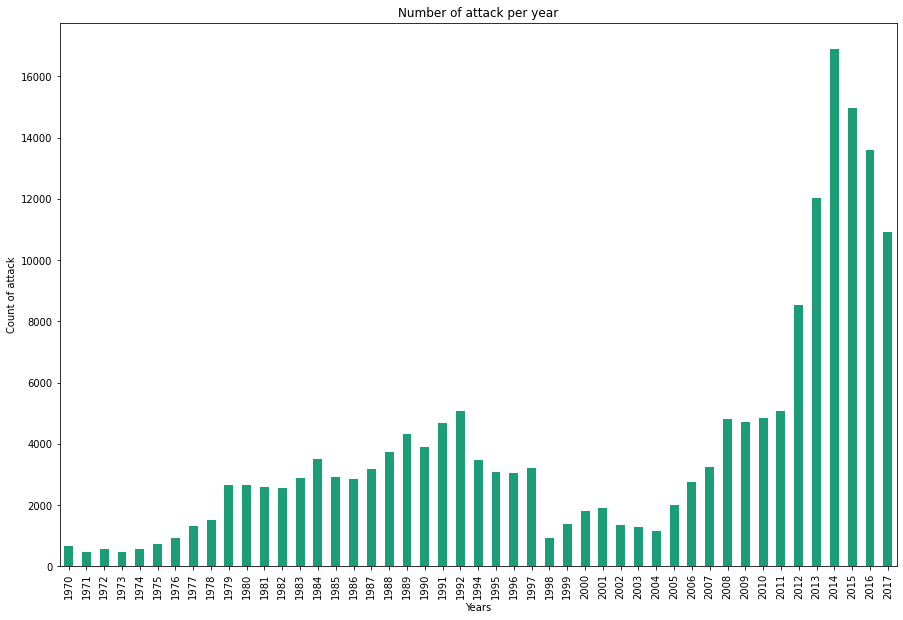

In [ ]:
# plotting a bar graph
Atk_pr_yr.plot(kind='bar',stacked=True, colormap='Dark2',title='Number of attack per year',xlabel ='Years' ,ylabel = 'Count of attack', figsize=(15,10))

Highest number of attacks were done in 2014 that was more than 16000 followed by the year 2015 and 2016. Least number of attacks were done in 1973.

## World Wide what are the major attack_types used?

In [ ]:
#groupby attacktype and count the values
Atk_typ = df.groupby(['attack_type'])['attack_type'].count()
Atk_typ 

attack_type
Armed Assault                          42669
Assassination                          19312
Bombing/Explosion                      88255
Facility/Infrastructure Attack         10356
Hijacking                                659
Hostage Taking (Barricade Incident)      991
Hostage Taking (Kidnapping)            11158
Unarmed Assault                         1015
Unknown                                 7276
Name: attack_type, dtype: int64

Text(0.5, 1.0, 'World wide Attack types')

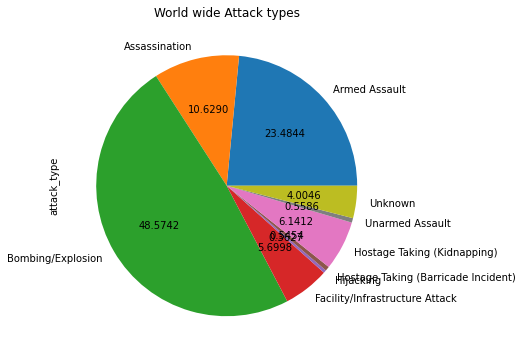

In [ ]:
# Plotting a pie chart
Atk_typ.plot(kind = 'pie', figsize=(6,6), autopct = '%.4f')
plt.title('World wide Attack types') 

world-wide 48.57% attacks were of Bombing and Explosion followed by Armed Assault 23.48%  and 10% assassination. The least used attacktype are hostage Taking(Barricade Incident) and hijacking

## Geographic Representation on Map, in which places attacks have been done since 1970

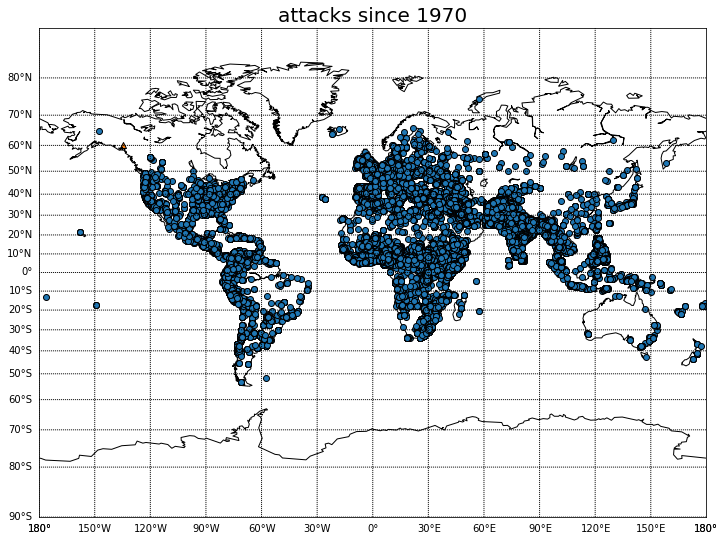

In [ ]:
#!pip install basemap
# importing basemap and creating a map
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(12,9))

#creating a basemap object
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')
# design map
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

#convert latitute and longitude to list
sites_lat_y = df['latitude'].tolist()
sites_lon_x = df['longitude'].tolist()

# plot the scatter with latitude and longitude values
m.scatter(sites_lon_x,sites_lat_y,latlon=True,  marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)
m.scatter(-135,60,latlon=True, marker='^', alpha=1, edgecolor='k', linewidth=1, zorder=1)
plt.title('attacks since 1970', fontsize=20)

plt.show()


From this map it can be assumed that countries like Greenland,Australia, sweden, norway, States of USA like Alaska, Northern Canada and north east of Russia are among very peaceful places throughout the world.

##Top 6 highly attacked states in india with different attack types

In [ ]:
# find all rows with country india and group by states
prov_df = df.loc[df['country_name'] == 'India' ]
prov_df = prov_df.groupby(['provstate'])['provstate'].count().reset_index(name='count').sort_values(['count'],ascending = False).head(6)

In [ ]:
#top 6 states attack-wise
prov_df.head(6)

provstate  count
12  Jammu and Kashmir   2454
3               Assam   1151
18            Manipur   1100
6        Chhattisgarh    979
25             Punjab    949
13          Jharkhand    887

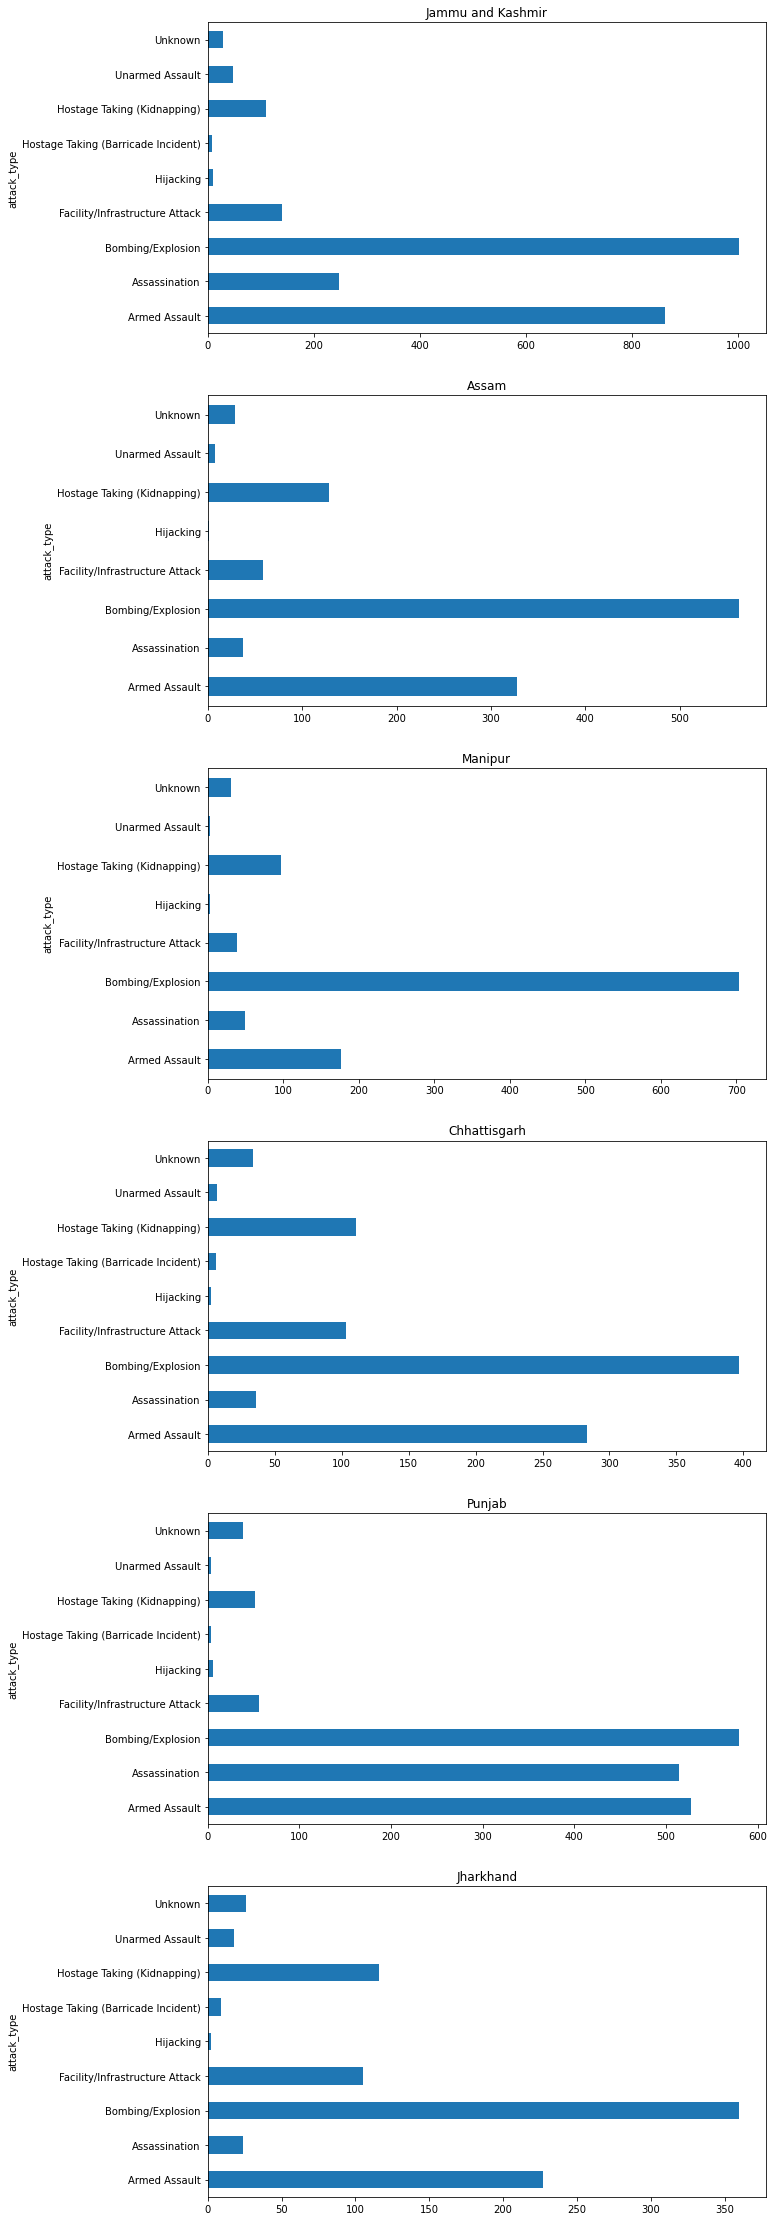

In [ ]:
#plot highly attacked states
plt.figure(1)
count = 1
for prov in prov_df['provstate']:
  new_df = df.loc[df['provstate']==prov]
  Atk_typ = new_df.groupby(['attack_type'])['attack_type'].count()
  plt.subplot(6,1,count)
  plt.title(prov)
  Atk_typ.plot(kind = 'barh', figsize = (10,40))
  #Atk_typ.plot(kind = 'pie', figsize = (21,20), autopct = '%.4f', labeldistance= 1.2)  # uncomment line to create pie chart 
  count+=1 

These are the most attacked states in india from 1970. Jammu & Kashmir is leading this Index followed by Assam, manipur, chattishgarh, punjab and jharkhand. Attack type varies state to state again Bombing and Explosion being the most used.

## Weapon used per Attacktype in India

In [ ]:
# in india what are the attacktype and corresponding weapons for those attacks have been used
ind = df.loc[df['country_name'] == 'India'].groupby(['attack_type', 'weapon']).size().reset_index()

#plot treemap using plotly
fig = px.treemap(ind, path=['attack_type', 'weapon'],
                 values=0,
                 color='weapon')
fig.show()

*In* India , mostly Explosives have been used in Bombing and Explosion being the highest attack type in india. Next is Armed Assault where Firearms are mostly used weapons others include Melee, Explosives and Incendiary.
Based on the treemap it can be said that Most preferred weapons are firearms apart from Bombing and explosion.

##Number of attacks per attack type in top 10 most attacked countries ?

---



In [ ]:
#top 5 rows
df.head() 

attack_type           city        country_name  \
0                   Assassination  Santo Domingo  Dominican Republic   
1     Hostage Taking (Kidnapping)    Mexico city              Mexico   
2                   Assassination        Unknown         Philippines   
3               Bombing/Explosion         Athens              Greece   
4  Facility/Infrastructure Attack        Fukouka               Japan   

                                 gang  day  month  year  nkill  success  \
0                              MANO-D    2      7  1970    1.0        1   
1  23rd of September Communist League    0      0  1970    0.0        1   
2                             Unknown    0      1  1970    1.0        1   
3                             Unknown    0      1  1970    NaN        1   
4                             Unknown    0      1  1970    NaN        1   

          nationality provstate region                       region  \
0  Dominican Republic       NaN      2  Central America & Caribbean   
1             Belgium   Federal      1                North America   
2       United States    Tarlac      5               Southeast Asia   
3       United States    Attica      8               Western Europe   
4       United States   Fukouka      4                    East Asia   

                   target1                       target      weapon  \
0             Julio Guzman  Private Citizens & Property     Unknown   
1  Nadine Chaval, daughter      Government (Diplomatic)     Unknown   
2                 Employee          Journalists & Media     Unknown   
3             U.S. Embassy      Government (Diplomatic)  Explosives   
4           U.S. Consulate      Government (Diplomatic)  Incendiary   

    latitude   longitude  
0  18.456792  -69.951164  
1  19.371887  -99.086624  
2  15.478598  120.599741  
3  37.997490   23.762728  
4  33.580412  130.396361

In [ ]:
# groupby country and attacktype and aggregate size
per_country_attack = df.groupby(['country_name','attack_type'])['attack_type'].size().reset_index(name='size')

In [ ]:
# again group the per_country_attack and aggregate sum according to attacktype
attack = per_country_attack.groupby(['country_name','attack_type'])['size'].sum()

In [ ]:
# get the sum of all attack in countries
nation_atk_count = {}
for country in list(per_country_attack['country_name']):
  if country not in nation_atk_count.values():
    nation_atk_count[country] = per_country_attack[per_country_attack['country_name'] == country]['size'].sum()
nation_atk_count = sorted(nation_atk_count.items(), key=lambda x:x[1], reverse = True)
sort_nation_atk_count = dict(nation_atk_count)
print(sort_nation_atk_count)


{'Iraq': 24636, 'Pakistan': 14368, 'Afghanistan': 12731, 'India': 11960, 'Colombia': 8306, 'Philippines': 6908, 'Peru': 6096, 'El Salvador': 5320, 'United Kingdom': 5235, 'Turkey': 4292, 'Somalia': 4142, 'Nigeria': 3907, 'Thailand': 3849, 'Yemen': 3347, 'Spain': 3249, 'Sri Lanka': 3022, 'United States': 2836, 'Algeria': 2743, 'France': 2693, 'Egypt': 2479, 'Lebanon': 2478, 'Chile': 2365, 'Libya': 2249, 'West Bank and Gaza Strip': 2227, 'Syria': 2201, 'Russia': 2194, 'Israel': 2183, 'Guatemala': 2050, 'South Africa': 2016, 'Nicaragua': 1970, 'Ukraine': 1709, 'Bangladesh': 1648, 'Italy': 1565, 'Greece': 1275, 'Nepal': 1215, 'Sudan': 967, 'Argentina': 815, 'Democratic Republic of the Congo': 775, 'Indonesia': 761, 'Germany': 735, 'Iran': 684, 'Kenya': 683, 'Burundi': 613, 'Mali': 566, 'Myanmar': 546, 'West Germany (FRG)': 541, 'Mexico': 524, 'Angola': 499, 'Japan': 402, 'Uganda': 394, 'Saudi Arabia': 371, 'Mozambique': 363, 'Cameroon': 332, 'Honduras': 323, 'Bolivia': 314, 'Ireland': 307,

In [ ]:
# create a pivot table of country and attackwise sum
atk_df = per_country_attack[per_country_attack['country_name'].isin(list(sort_nation_atk_count.keys())[0:10])]
pivot = atk_df.pivot(index='country_name', columns='attack_type', values='size')
pivot

attack_type     Armed Assault  Assassination  Bombing/Explosion  \
country_name                                                      
Afghanistan            2877.0          954.0             6245.0   
Colombia               1972.0         1343.0             3128.0   
El Salvador            2216.0          449.0             2055.0   
India                  3184.0         1229.0             4825.0   
Iraq                   3155.0         1287.0            18286.0   
Pakistan               3859.0         1406.0             7613.0   
Peru                   1328.0         1002.0             3115.0   
Philippines            2158.0         1099.0             2213.0   
Turkey                 1289.0          437.0             1957.0   
United Kingdom          670.0         1651.0             2092.0   

attack_type     Facility/Infrastructure Attack  Hijacking  \
country_name                                                
Afghanistan                              355.0       16.0   
Colombia                                 275.0       33.0   
El Salvador                              194.0        NaN   
India                                    996.0       43.0   
Iraq                                     154.0       13.0   
Pakistan                                 300.0       19.0   
Peru                                     223.0        8.0   
Philippines                              452.0       34.0   
Turkey                                   279.0       13.0   
United Kingdom                           652.0       19.0   

attack_type     Hostage Taking (Barricade Incident)  \
country_name                                          
Afghanistan                                    27.0   
Colombia                                       89.0   
El Salvador                                   117.0   
India                                          44.0   
Iraq                                           24.0   
Pakistan                                       35.0   
Peru                                           74.0   
Philippines                                    53.0   
Turkey                                         13.0   
United Kingdom                                 14.0   

attack_type     Hostage Taking (Kidnapping)  Unarmed Assault  Unknown  
country_name                                                           
Afghanistan                          1011.0             73.0   1173.0  
Colombia                             1058.0             14.0    394.0  
El Salvador                           154.0              1.0    134.0  
India                                1184.0            143.0    312.0  
Iraq                                  946.0              6.0    765.0  
Pakistan                              823.0             77.0    236.0  
Peru                                   97.0              4.0    245.0  
Philippines                           602.0              4.0    293.0  
Turkey                                158.0             10.0    136.0  
United Kingdom                         53.0             46.0     38.0

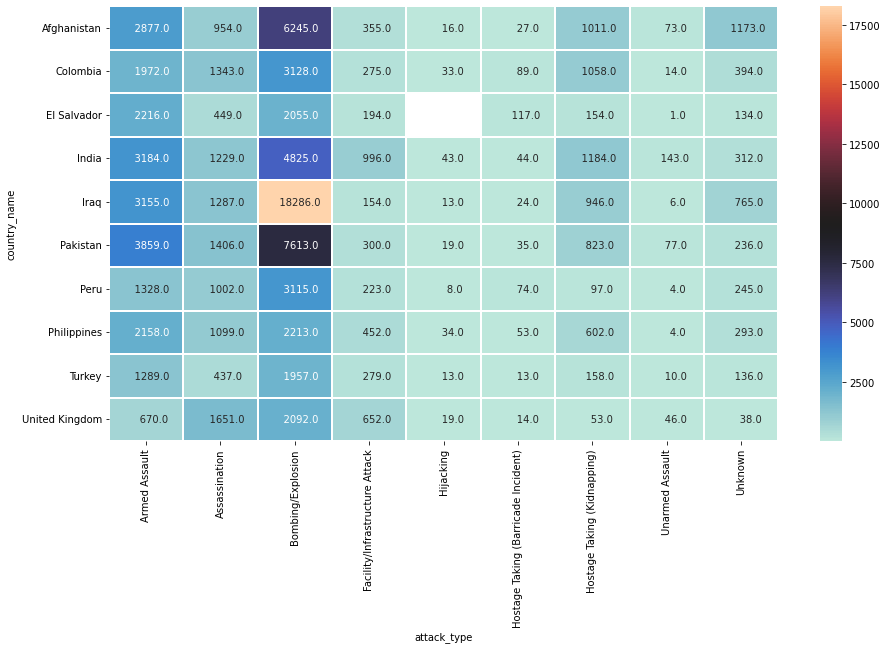

In [ ]:
# plot a heatmap
fig, ax = plt.subplots(figsize=(15,8))
atk_map = sns.heatmap(pivot,annot=True,linewidths=1, linecolor = 'white', cmap="icefire" ,ax=ax,fmt="10")  
plt.show()

In these Top 10 Most Attacked Countries Iraq was enormously attacked by Bombing and Explosions outreaching the sum of any two attack_types throughout the globe.it was attacked 18000+ times by bombing. Second name is of pakistan Again in Bombing and explosion followed by pakistan.
If we compare the attack type used in these top 10 highest attacked countries ranking would be(1: Bombing/Explosion, 2:Armed Assault, 3: Assassination)


## Terrorist group attacking most number of times?

In [ ]:
# top 2 rows
df.head(2)

attack_type           city        country_name  \
0                Assassination  Santo Domingo  Dominican Republic   
1  Hostage Taking (Kidnapping)    Mexico city              Mexico   

                                 gang  day  month  year  nkill  success  \
0                              MANO-D    2      7  1970    1.0        1   
1  23rd of September Communist League    0      0  1970    0.0        1   

          nationality provstate region                       region  \
0  Dominican Republic       NaN      2  Central America & Caribbean   
1             Belgium   Federal      1                North America   

                   target1                       target   weapon   latitude  \
0             Julio Guzman  Private Citizens & Property  Unknown  18.456792   
1  Nadine Chaval, daughter      Government (Diplomatic)  Unknown  19.371887   

   longitude  
0 -69.951164  
1 -99.086624

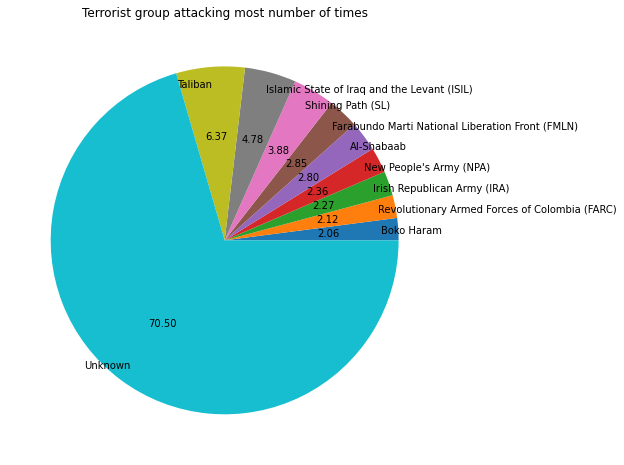

In [ ]:
# Group by gang and see frequency
new = df.groupby(['gang'])['gang'].count().reset_index(name='count').sort_values(['count']).tail(10)
plt.figure(figsize = (8,8))
plt.title('Terrorist group attacking most number of times')
plt.pie(new['count'],labels= new['gang'] , autopct = '%.2f', labeldistance=0.9)
#plt.legend()
plt.show()

Worldwide nearly 70.50 Attacks were done by unknown Groups. 
If we talk about grouped attacks the highest known active terrorist group is Taliban undertking 6.37% of global attacks followed by ISIL, and Shining Path(SL) group

## Statewise Attacks in India

In [ ]:
# inatalling geopandas module for visualizing india map for attack counts
%pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# getting necessary shp file from drive
shp_gdf = gpd.read_file('/content/drive/MyDrive/AlmaBetter /Capstone Project/Global Terrorism Analysis/indian boundary (imp for eda)/Shapefile/India_State_Boundary.shp')
shp_gdf.reset_index(inplace=True)
shp_gdf.sort_values('Name', inplace = True)

In [ ]:
# group by provstate
states_count = df.groupby(['provstate'])['provstate'].count()
states_count = states_count.to_frame()


In [ ]:
# rename provstate as state for better readibility and unerstanding
states_count.rename(columns={'provstate':'State','provstate':'Values'}, inplace=True)
states_count.head()

Values
provstate                                              
(Region) of Republican Subordination (Province)       1
(Republic of) Ingushetia                              1
A Coruna                                              5
Aargau                                                4
Abia                                                 13

In [ ]:
 # creating a list of count of attack and add it in shp_gdf dataframe
 num_of_attacks = [0,292,24,1151,688,47,979,0,208,5,85,50,24,2454,887,71,98,2454,0,75,302,1100,294,27,115,649,2,949,43,4,164,24,117,201,24,650] 

In [ ]:
shp_gdf['Attacks']=num_of_attacks
shp_gdf.head() 

index               Name             Type  \
1       1  Andaman & Nicobar  Union Territory   
16     16     Andhra Pradesh            State   
26     26  Arunachal Pradesh            State   
25     25              Assam            State   
32     32              Bihar            State   

                                             geometry  Attacks  
1   MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...        0  
16  POLYGON ((84.67571 19.16721, 84.67725 19.16670...      292  
26  POLYGON ((96.08538 29.45928, 96.09262 29.45613...       24  
25  POLYGON ((93.24961 24.97312, 93.25244 24.97428...     1151  
32  POLYGON ((84.10880 27.52173, 84.10896 27.52131...      688

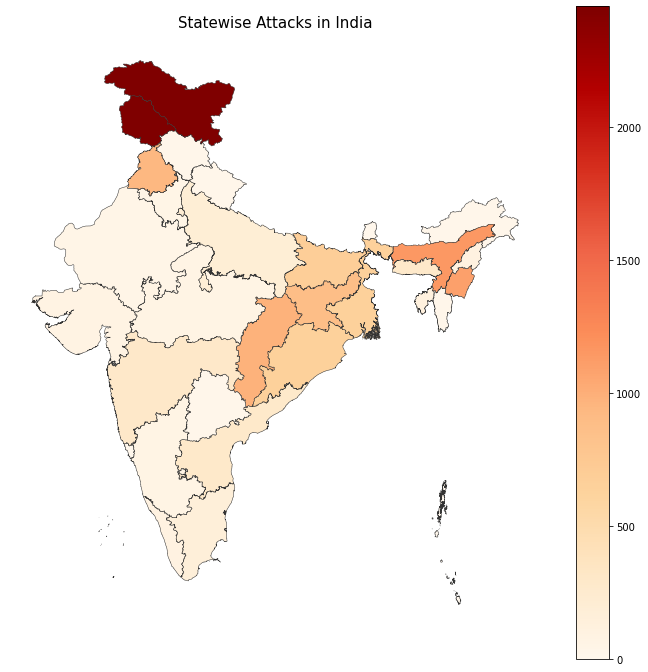

In [ ]:
# creating a map for density of attacks
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Statewise Attacks in India',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = shp_gdf.plot(column='Attacks', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

 this map itself represents the attacks all over the country along with its density.. also it can be seen that states like goa, karnataka, madhya-pradesh, talangana, arunachal pradesh, uttarakhand, himachal pradesh are least attacked states.
 thus they are safest states to live in india in against terrorism 

## What most of the addnotes say?

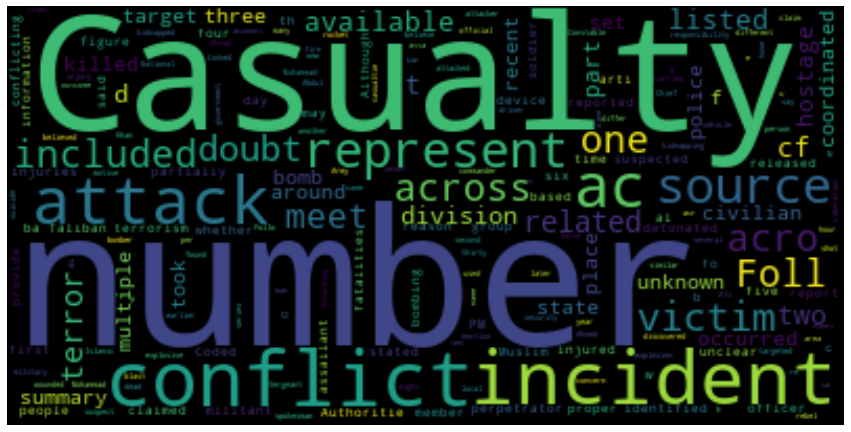

In [ ]:
# get addnote data where null value are not present
txt_col = gt_df[gt_df['addnotes'].isna() == False]['addnotes']

text = ''
for n in range(len(txt_col)):
  text = text+' '.join(str(txt_col.iloc[n:n+1]).split())

text = text.replace('Name: addnotes, dtype: object',' ')
text = text.replace('...',' ')
text = text.replace('  ',' ')
text = text.replace(',','')
text = text.replace('.',' ')

# create a wordcloud
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)

# show wordcloud
plt.figure(figsize = (15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

addnotes were the notes regarding the attacs by the media or the journalists. so most of the time casuality, number, conflict, incident, represent, source, victim word have been used.
they by themselve represents that mostly the concern is about the number of casualities in the attacks or conflicts, about the victim and source of the attack.

# **Conclusion**

* Based on the whole EDA it can be suggested that the attacks from 1970 were in 
huge number.
* Further steps can be taken to reduce the effect of terrorism like.
* Paying special attention to Highly attack prone regions.
* Strong regulation and inspection can be made on Explosions as they are most frequent and common attack types.
* Strong Terror Groups like Taliban, ISIL, Shining Path must be Investigated regularly.
* In India North and East part is highly terror prone Area so that must be protected properly.
* There must be ban on explosive compounds and their manufacturing units must be proper monitored.
* There must be some terror intelligence unit to regularly test suspicious situations in Prone areas.
* As Hostage Taking is also one of the major attack type, As a preventive measure government must introduce some training to common citizens to handle suspicious conditions.
* Number of Unknown attacks are the highest of all time, possible reason behind this maybe:
* Naxalites and other local terror groups attacked for temporary causes.
Large terror group attacked but did not acceped.
* Few countries like iran, syria, afganistan are very highly attacked nations, citizen of those countries are suffering from high violence. Some of those countries are controlled by terror groups thus UN must create some special forces to defend terror groups in these small and weak nations.


